## Explanation of Problem


In this section of the etivity we will be analysing the California Housing Dataset. The target variable for this dataset is the median house value for the California district. Our aim is to predict the median house value based on eight different features

Before applying our regression models we will preprocess our dataset by:

  > - Searching for NANs.
  > - Using four different outlier techniques to identify and remove outliers. Outliers in the data are one of the biggest downfall for any model performance. Outliers are extreme values for the specific column which affects the generalization of the data and model.
  
The outlier trimming techniques used in our dataset are:

  > - Z-score based technique
  > - IQR based filtering
  > - Percentile based technique
  > - Winsorization

After preprocessing the dataset, we will apply and analyse four differnt regression models to predict the target variable :


  > - Linear Regression
  > - Logistic Regression
  > - XGBoost Regressor
  > - Kneighbors



## Z-score based technique

A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution. 

The Z score, aslo known as the standard score helps to understand if there are any data values smaller or greater than the mean and how far away form the mean they are. It tells us specifically how many standard deviations away such data values are from the mean.

A commonly used threshold is 3. If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

$z score=\frac{z - μ}{\frac{s}{\sqrt{n}}}$

with μ = mean
and z = z value

(Ektamaini 2020)



## IQR based filtering

The IQR is also called the midspread, middle 50%, or H‑spread, it is a measure of statistical dispersion and is equal to the difference between 75th and 25th percentiles (IQR = Q3 − Q1).
  
After the IQR is calculated we establish or Upper and Lower ranges.

  > - Lower Range = Q1 -(1.5 * IQR)
  > - Upper Range = Q3 + (1.5 * IQR)
 
Once the upper range and lower ranage are calcualated, any value less than the lower range or greater than the upper range is considered an ouftlier and should be removed.

IQR based filtering is a trimmed estimator, defined as the 25% trimmed range, and is a commonly used robust measure of scale and graphed using a box plot.


(Nair 2019)



## Percentile based technique

The percentile technique provides a way of estimating proportions of the data that should fall above and below a given value, called a percentile. A percentile splits a set of ordered data into hundredths. For example, 70 % of the data should fall below the 70th percentile. The 50th percentile is called the median. 


The pth percentile is a value, Y(p), such that at most (100p) % of the measurements are less than this value and at most 100(1−p) % are greater. 





## Winsorisation

Winsorization is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data. The mean value calculated after such replacement of the extreme values is called winsorized mean.

Winsorized estimators are usually more robust to outliers than their more standard forms.

Winsorizing has one main difference to alternartive outlier detection techniques. Techniques such as the Z score simply discard extreme values through 'trimming'. However, winsorisation is a method of censoring data whereby extreme values are instead replaced by certain percentiles (the trimmed minimum and maximum).

$Ŷ^*=\sum y + \sum (w-1)y^*$

with $y^*=$ y if $y<=k$ or k if $y>k$


(Nshbardia 2021)



**Bibliography**

Ektamaini (2020)_Z score for Outlier Detection – Python_, GeeksforGeeks, available: https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/ [accessed 28 Oct 2021]

Nair, P.(2019)_Hands-on : Outlier Detection and Treatment in Python Using 1.5 IQR rule_, available: https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414 [accessed 28 Oct 2021].

Nshbardia (2021)_Winsorization_, available: https://www.geeksforgeeks.org/winsorization/ [accessed 28 Oct 2021].

Nist Sematech (2021)_Percentiles_, available: https://www.itl.nist.gov/div898/handbook/prc/section2/prc262.htm#:~:text=Order%20statistics%20provide%20a%20way,given%20value%2C%20called%20a%20percentile.&text=Percentiles%20split%20a%20set%20of,fall%20below%20the%2070th%20percentile [accessed 28 Oct 2021].


In [4]:
# data manipulation and visualization
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize, StandardScaler, RobustScaler, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.datasets import load_iris, make_classification
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# scoring
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score

# warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("deprecated", DeprecationWarning)

# SSL issues
import requests 
requests.packages.urllib3.disable_warnings() 
import ssl 
try:
    _create_unverified_https_context = ssl._create_unverified_context 
except AttributeError: 
    pass 
else: 
    ssl._create_default_https_context = _create_unverified_https_context

In [7]:
# load the dataset
df = fetch_california_housing(as_frame=True)
type(df)

sklearn.utils.Bunch

In [8]:
# transform as pandas DataFrame
data = pd.DataFrame(data= np.c_[df['data'], df['target']],
                     columns= df['feature_names'] + ['target'])

In [9]:
# get a grasp on what variables and values are there in the dataset
data.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


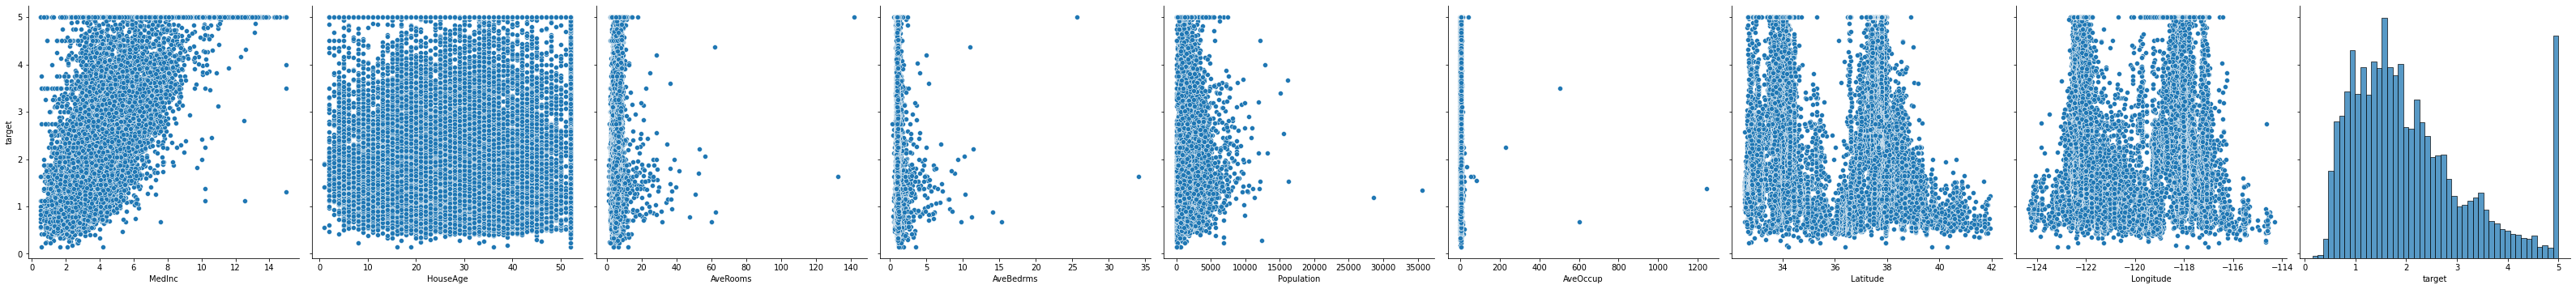

In [10]:
# plotting target correlation with all features
sns.pairplot(data, y_vars="target", height = 5)

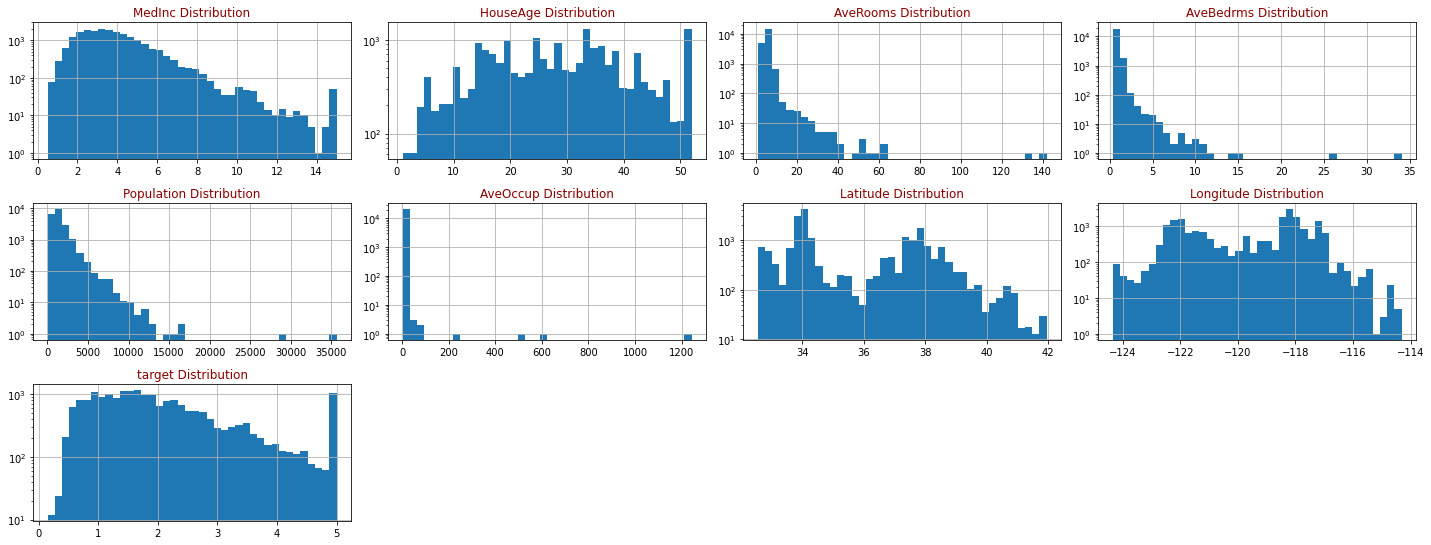

In [11]:
# plot of all features' log distributions
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        data[feature].hist(bins=40,ax=ax)
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log') # responds to skewness towards large values; when few points are much larger than the bulk of the data
    fig.tight_layout()
    plt.show()

draw_histograms(data,data.columns,8,4)


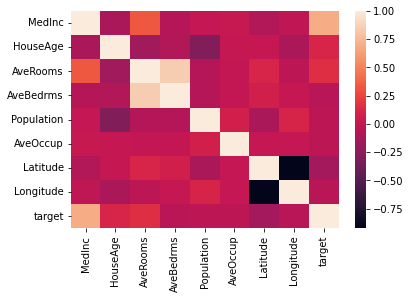

In [12]:
# plotting correlation heatmap
sns.heatmap(data.corr());

In [13]:
# target correlation with each feature
corr_mat = data.corr()
corr_mat['target'].sort_values(ascending = False)

target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64

let's observe the above correlations; we see that target (price value) is more correlated with average rooms than it is with average bedrooms; it makes sense, since a house with many rooms but less bedrooms indicates a house with for example many bathrooms, or a home cinema, which are distinctive features of a pricey abode

In [14]:
# check for missing values or NANs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


* there are no missing values, hence no NAN preprocessing is required

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

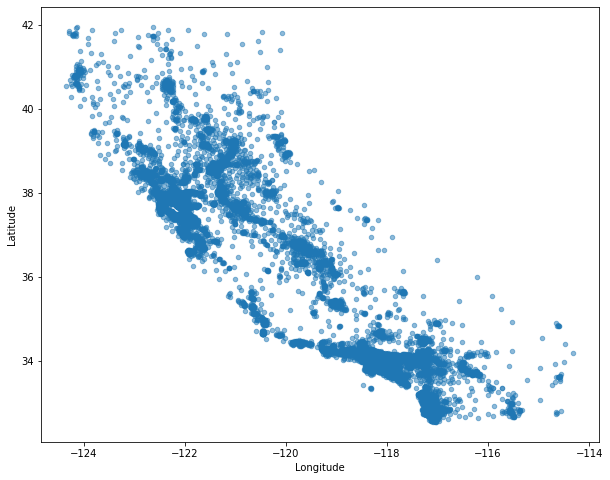

In [15]:
# visualizing californian housing density 
data.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.5, figsize=(10,8))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

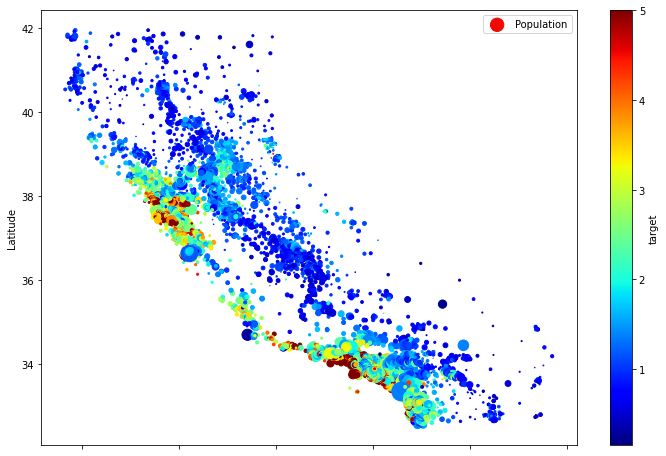

In [16]:
# visualizing density AND price of housing according to location
data.plot(kind='scatter', x='Longitude', y='Latitude', alpha=1
         , s=data['Population']/100, label='Population', figsize=(12,8)
         , c='target', cmap=plt.get_cmap('jet'))

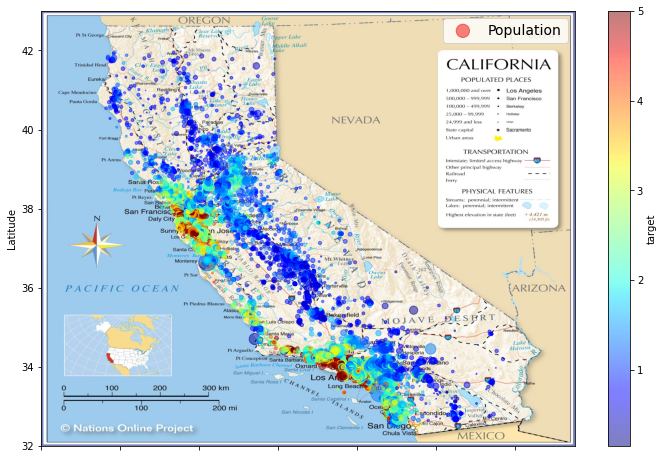

In [18]:
import matplotlib.image as mpimg

# visualizing density AND price of housing according to location
ax = data.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.5
         , s=data['Population']/100, label='Population', figsize=(12,8)
         , c='target', cmap=plt.get_cmap('jet'))

# load image. if the code should be shared, download this image from the web to your local directory
california_img = mpimg.imread('California_map.jpg')

# display previous plot against loaded image
# we tweak the extent parameter, to correctly trace the plot
plt.imshow(california_img, extent=[-126, -112.5, 32, 43], alpha=1,
          cmap=plt.get_cmap('jet'))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(fontsize=14)
plt.show()

In [19]:
# rename dataset
data.columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']

In [20]:
data.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


# Z-Score

In [21]:
# copy for safety reasons
df_z = data.copy()

In [22]:
df_z.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [23]:
# finding the boundary values
threshold = 2
HA = df_z['MedInc'].mean() + threshold*df_z['MedInc'].std()
LA = df_z['MedInc'].mean() - threshold*df_z['MedInc'].std()
print("highest allowed",HA)
print("lowest allowed",LA)
# we chose to remove values which are above or below + or - 2 standard deviations from the mean, respectively
# 2 standard deviations from the mean typically include 95% of the data

highest allowed 7.670314438797514
lowest allowed 0.07102756701643909


In [24]:
# couting the outliers
outliers = df_z[(df_z['MedInc'] > HA) | (df_z['MedInc'] < LA)]
outliers.shape

(851, 9)

In [25]:
# couting the outliers
outliers = df_z[(df_z['MedInc'] > HA) | (df_z['MedInc'] < LA)]
outliers.shape

(851, 9)

In [26]:
# trimming of outliers
df_z_trimmed = df_z[(df_z['MedInc'] < HA) & (df_z['MedInc'] > LA)]

In [27]:
df_z_trimmed.shape

(19789, 9)

In [28]:
# capping on outliers
UL = df_z['MedInc'].mean() + threshold*df_z['MedInc'].std()
LL = df_z['MedInc'].mean() - threshold*df_z['MedInc'].std()

In [29]:
# descriptive statistics on the new median income
df_z_trimmed['MedInc'].describe()

count    19789.000000
mean         3.621392
std          1.443320
min          0.499900
25%          2.528400
50%          3.448500
75%          4.559000
max          7.668500
Name: MedInc, dtype: float64

In [30]:
# scaling the data
scaler = StandardScaler().fit(df_z_trimmed)
data_scaled = scaler.transform(df_z_trimmed)

In [31]:
# transform back to a DataFrame object
data_scaled = pd.DataFrame(data_scaled, columns = df_z_trimmed.columns)

data_scaled.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.519262,1.860533,1.199130,-0.052629,-0.827085,-0.035866,1.026595,-1.333287,1.485727
1,1.400770,1.860533,0.196665,-0.053431,-0.772365,-0.079057,1.026595,-1.338275,1.382682
2,0.155762,1.860533,0.385126,-0.036793,-0.766187,-0.141297,1.026595,-1.338275,1.391269


In [32]:
# define X and y 
X_z = data_scaled.iloc[:,:-1]
y_z = data_scaled['target']

# value counts
print(X_z.shape, y_z.shape)

(19789, 8) (19789,)


In [33]:
# split 
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(X_z, y_z, test_size=0.2) 

# value counts
print(X_train_z.shape,y_train_z.shape,  X_test_z.shape, y_test_z.shape)

(15831, 8) (15831,) (3958, 8) (3958,)


# IQR 

In [34]:
# copy for safety reasons
df_iqr = data.copy()
df_iqr.shape

(20640, 9)

<AxesSubplot:xlabel='MedInc'>

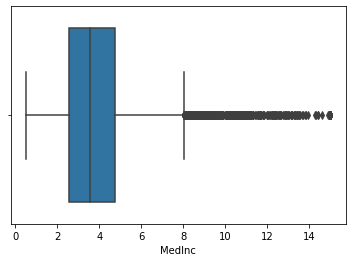

In [35]:
# box-plot for the skewed feature
sns.boxplot(df_iqr['MedInc'])

In [36]:
# finding the IQR
Q1 = df_iqr['MedInc'].quantile(0.25)
Q3 = df_iqr['MedInc'].quantile(0.75)
IQR = Q3 - Q1

In [37]:
# finding upper and lower limit
UL2 = Q3 + 0.75 * IQR
LL2 = Q1 - 0.75 * IQR

In [38]:
# finding Outliers
df_iqr[df_iqr['MedInc'] > UL2]
df_iqr[df_iqr['MedInc'] < LL2]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
50,0.9218,21.0,2.045662,1.034247,735.0,1.678082,37.82,-122.27,1.719
57,0.8172,52.0,6.102459,1.372951,728.0,2.983607,37.82,-122.28,0.853
62,0.9011,50.0,6.229508,1.557377,377.0,3.090164,37.81,-122.29,0.861
66,0.8056,48.0,4.382530,1.066265,788.0,2.373494,37.81,-122.30,0.844
71,0.7286,46.0,3.375451,1.072202,582.0,2.101083,37.81,-122.29,0.952
...,...,...,...,...,...,...,...,...,...
19875,0.7445,19.0,3.567568,1.045045,641.0,2.887387,36.33,-119.29,1.125
19880,0.7800,10.0,3.835766,1.083942,927.0,3.383212,36.33,-119.28,0.555
19955,0.8229,30.0,3.763819,1.075377,537.0,2.698492,36.21,-119.34,0.684
20091,0.4999,43.0,7.846154,1.461538,44.0,3.384615,38.07,-120.19,1.625


In [39]:
# trimming
new_df_iqr = df_iqr[df_iqr['MedInc'] < UL2]
new_df_iqr.shape

(18868, 9)

In [40]:
new_df_iqr.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697


In [44]:
# scaling the data
scaler = StandardScaler().fit(new_df_iqr)
data_scaled = scaler.transform(new_df_iqr)

# transform back to a DataFrame object
data_scaled = pd.DataFrame(data_scaled, columns = new_df_iqr.columns)

data_scaled.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,1.714156,1.849084,0.226432,-0.058085,-0.778678,-0.078343,1.014883,-1.339372,1.543056
1,0.302971,1.849084,0.413223,-0.041798,-0.772445,-0.139130,1.014883,-1.339372,1.552144
2,0.452658,1.849084,-0.198095,0.003978,-0.907796,-0.146025,1.014883,-1.339372,0.820067


In [45]:
# define X and y 
X_iqr = data_scaled.iloc[:,:-1]
y_iqr = data_scaled['target']

In [46]:
# value counts
print(X_iqr.shape, y_iqr.shape)

(18868, 8) (18868,)


In [47]:
# split 
X_train_iqr, X_test_iqr, y_train_iqr, y_test_iqr = train_test_split(X_iqr, y_iqr, test_size=0.2) 

In [48]:
# value counts
print(X_train_iqr.shape,y_train_iqr.shape,  X_test_iqr.shape, y_test_iqr.shape)

(15094, 8) (15094,) (3774, 8) (3774,)


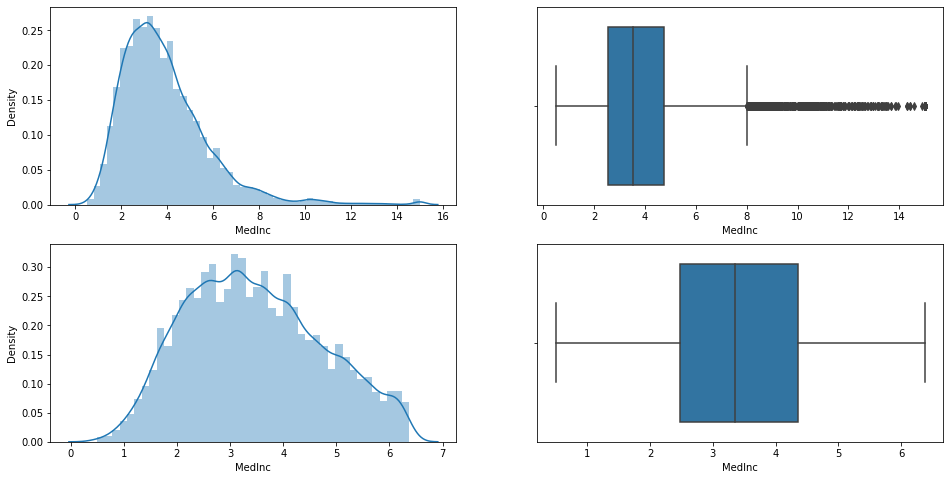

In [49]:
# box plot before vs after trim
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_iqr['MedInc'])
plt.subplot(2,2,2)
sns.boxplot(df_iqr['MedInc'])
plt.subplot(2,2,3)
sns.distplot(new_df_iqr['MedInc'])
plt.subplot(2,2,4)
sns.boxplot(new_df_iqr['MedInc'])
plt.show()

In [50]:
# capping
new_df_cap = df_iqr.copy()
new_df_cap['MedInc'] = np.where(
    new_df_cap['MedInc'] > UL2, UL2,
    np.where(
        new_df_cap['MedInc'] < LL2, LL2,
        new_df_cap['MedInc']
    )
)

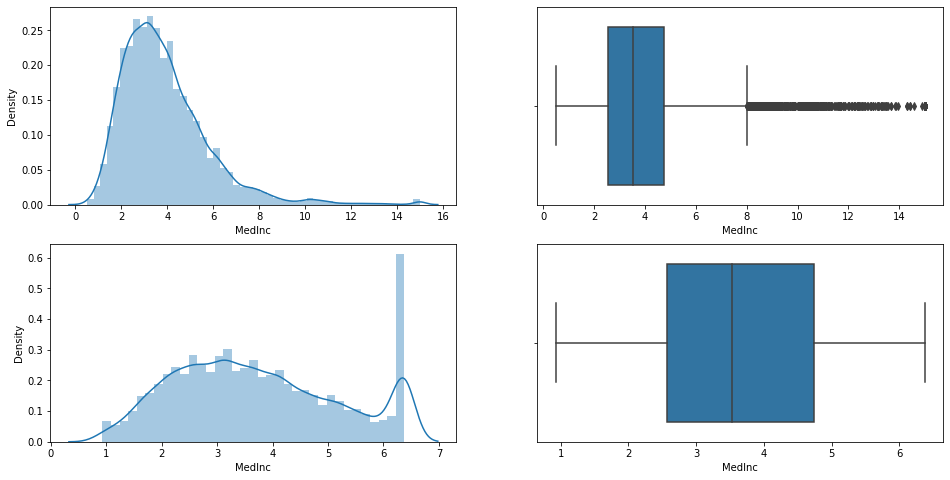

In [51]:
# compare the plots after capping
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_iqr['MedInc'])
plt.subplot(2,2,2)
sns.boxplot(df_iqr['MedInc'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['MedInc'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['MedInc'])
plt.show()

# Percentile

In [52]:
# copy for safety reasons
df_per = data.copy()

In [53]:
# upper and lower limit
UL3 = df_per['MedInc'].quantile(0.9)
LL3 = df_per['MedInc'].quantile(0.1)

In [54]:
# apply trimming
new_df_per = df_per[(df_per['MedInc'] <= UL3) & (df_per['MedInc'] >= LL3)]

In [55]:
new_df_per.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,16514.000000,16514.000000,16514.000000,16514.000000,16514.000000,16514.000000,16514.000000,16514.000000,16514.000000
mean,3.653800,28.602216,5.328212,1.094804,1455.222781,3.004350,35.631026,-119.571531,1.960492
std,1.091682,12.475393,2.248777,0.456197,1143.269187,6.412276,2.132339,1.996756,0.966144
min,1.903800,1.000000,0.846154,0.375000,6.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.739950,18.000000,4.485492,1.006981,809.000000,2.411072,33.930000,-121.780000,1.266000
50%,3.534700,29.000000,5.185730,1.049131,1190.000000,2.797039,34.260000,-118.470000,1.771000
75%,4.437500,37.000000,5.859150,1.097764,1757.000000,3.262612,37.720000,-118.000000,2.426000
max,6.159200,52.000000,132.533333,34.066667,35682.000000,599.714286,41.950000,-114.570000,5.000010


In [56]:
# scaling the data
scaler = StandardScaler().fit(new_df_per)
data_scaled = scaler.transform(new_df_per)

In [57]:
# transform back to a DataFrame object
data_scaled = pd.DataFrame(data_scaled, columns = new_df_per.columns)
data_scaled.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,1.822288,1.875572,0.217520,-0.047667,-0.784811,-0.071179,1.04066,-1.341451,1.503453
1,0.176247,1.875572,0.424084,-0.030082,-0.778688,-0.128333,1.04066,-1.341451,1.512768
2,0.350845,1.875572,-0.251946,0.019340,-0.911644,-0.134816,1.04066,-1.341451,0.762340


In [58]:
# define X and y 
X_per = data_scaled.iloc[:,:-1]
y_per = data_scaled['target']

In [59]:
# value counts
print(X_per.shape, y_per.shape)

(16514, 8) (16514,)


In [60]:
# split 
X_train_per, X_test_per, y_train_per, y_test_per = train_test_split(X_per, y_per, test_size=0.2) 

In [61]:
# value counts
print(X_train_per.shape,y_train_per.shape,  X_test_per.shape, y_test_per.shape)

(13211, 8) (13211,) (3303, 8) (3303,)


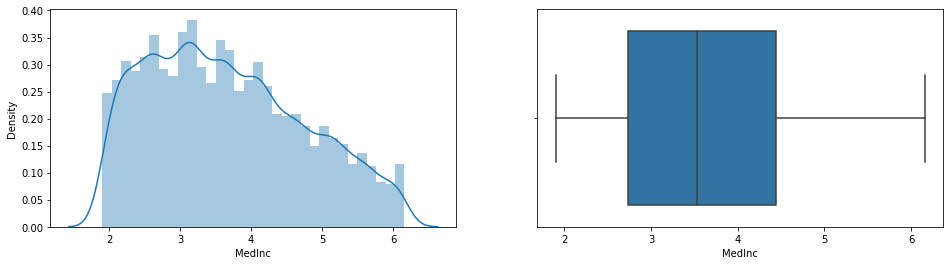

In [62]:
# compare the distribution trimming
plt.figure(figsize=(16,4))
plt.subplot(1,2,1) 
sns.distplot(new_df_per['MedInc'])
plt.subplot(1,2,2)
sns.boxplot(new_df_per['MedInc'])
plt.show()

# Windorisation

In [63]:
# copy for safety reasons
df_win = data.copy()

In [64]:
# apply capping (Winsorization)
df_win['MedInc'] = np.where(df_win['MedInc'] >= UL3, UL3,
        np.where(df_win['MedInc'] <= LL3, LL3,
        df_win['MedInc']))

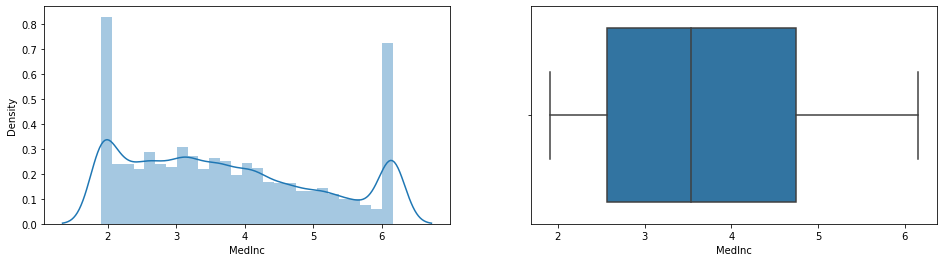

In [65]:
# compare the distribution after capping
plt.figure(figsize=(16,4))
plt.subplot(1,2,1) 
sns.distplot(df_win['MedInc'])
plt.subplot(1,2,2)
sns.boxplot(df_win['MedInc'])
plt.show()

In [66]:
df_win.shape

(20640, 9)

In [67]:
# scaling the data
scaler = StandardScaler().fit(df_win)
data_scaled = scaler.transform(df_win)

In [68]:
# transform back to a DataFrame object
data_scaled = pd.DataFrame(data_scaled, columns = df_win.columns)
data_scaled.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,1.771379,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,1.771379,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.771379,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693


In [69]:
# define X and y 
X_w = data_scaled.iloc[:,:-1]
y_w = data_scaled['target']

In [78]:
# value counts
print(X_w.shape, y_w.shape)

(20640, 8) (20640,)


In [ ]:
# split 
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size=0.2) 

# value counts
print(X_train_w.shape,y_train_w.shape,  X_test_w.shape, y_test_w.shape)

# Random Search To Optimize XGBoost Parameters

* iterates through all parameters to find the best combination


* number of iterations is set as 3, otherwise the calculation time would be very long


* but in order to find the optimal parameter setting, you should set iterations much higher and wait overnight

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_w, y_w, test_size=0.1)

XGBR = XGBRegressor()

params = {
    
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(20, 150)),
    'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
    'subsample_for_bin': list(range(20000, 300000, 20000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.6, 1, 10)),
    'subsample': list(np.linspace(0.5, 1, 100)),
    'is_unbalance': [True, False]
}

n_iter_search = 10 #should be much more
random_search = RandomizedSearchCV(XGBR, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

random_search.fit(X_train, y_train)

[21:29:13] WARNING: /private/var/folders/b8/fm9sphq57_38t7mgnzjkdvz80000gn/T/pip-install-ppd_o4zb/xgboost_f6827062257e47f88ff132cd08a1f211/build/temp.macosx-11-arm64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "boosting_type", "is_unbalance", "min_child_samples", "num_leaves", "subsample_for_bin" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:29:14] WARNING: /private/var/folders/b8/fm9sphq57_38t7mgnzjkdvz80000gn/T/pip-install-ppd_o4zb/xgboost_f6827062257e47f88ff132cd08a1f211/build/temp.macosx-11-arm64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "boosting_type", "is_unbalance", "min_child_samples", "num_leaves", "subsample_for_bin" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings 

[21:29:22] WARNING: /private/var/folders/b8/fm9sphq57_38t7mgnzjkdvz80000gn/T/pip-install-ppd_o4zb/xgboost_f6827062257e47f88ff132cd08a1f211/build/temp.macosx-11-arm64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "boosting_type", "is_unbalance", "min_child_samples", "num_leaves", "subsample_for_bin" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:29:23] WARNING: /private/var/folders/b8/fm9sphq57_38t7mgnzjkdvz80000gn/T/pip-install-ppd_o4zb/xgboost_f6827062257e47f88ff132cd08a1f211/build/temp.macosx-11-arm64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "boosting_type", "is_unbalance", "min_child_samples", "num_leaves", "subsample_for_bin" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings 

[21:29:30] WARNING: /private/var/folders/b8/fm9sphq57_38t7mgnzjkdvz80000gn/T/pip-install-ppd_o4zb/xgboost_f6827062257e47f88ff132cd08a1f211/build/temp.macosx-11-arm64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "boosting_type", "is_unbalance", "min_child_samples", "num_leaves", "subsample_for_bin" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:29:30] WARNING: /private/var/folders/b8/fm9sphq57_38t7mgnzjkdvz80000gn/T/pip-install-ppd_o4zb/xgboost_f6827062257e47f88ff132cd08a1f211/build/temp.macosx-11-arm64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "boosting_type", "is_unbalance", "min_child_samples", "num_leaves", "subsample_for_bin" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings 

[21:29:39] WARNING: /private/var/folders/b8/fm9sphq57_38t7mgnzjkdvz80000gn/T/pip-install-ppd_o4zb/xgboost_f6827062257e47f88ff132cd08a1f211/build/temp.macosx-11-arm64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "boosting_type", "is_unbalance", "min_child_samples", "num_leaves", "subsample_for_bin" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:29:39] WARNING: /private/var/folders/b8/fm9sphq57_38t7mgnzjkdvz80000gn/T/pip-install-ppd_o4zb/xgboost_f6827062257e47f88ff132cd08a1f211/build/temp.macosx-11-arm64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "boosting_type", "is_unbalance", "min_child_samples", "num_leaves", "subsample_for_bin" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings 

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                                      0.595959595959596,
                                                      0.601010101010101,
                                             

In [87]:
best_regressor = random_search.best_estimator_

y_pred = best_regressor.predict(X_test)

# Calculate MAE
rmse_pred = mean_absolute_error(y_test, y_pred)

# Get predictions
y_pred_test = best_regressor.predict(X_test)

print(best_regressor)

XGBRegressor(base_score=0.5, booster='gbtree', boosting_type='dart',
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.9555555555555555, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', is_unbalance=False,
             learning_rate=0.17478877871816373, loss='ls', max_delta_step=0,
             max_depth=5, min_child_samples=130, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=400, n_jobs=8,
             num_leaves=55, num_parallel_tree=1, predictor='auto',
             random_state=29, reg_alpha=0.22448979591836732,
             reg_lambda=0.26530612244897955, scale_pos_weight=1,
             subsample=0.7878787878787878, ...)


# Running the models using class & methods

In [88]:
# We create a class, define its objects and create a method
# Upon being called, the method displays the evaluation metrics associated with a particular model 

class Evaluate:
    def __init__(self, algorithm):
        self.algo = algorithm

    def get_score(self, X_test, y_test):
        y_pred = self.algo.predict(X_test)
        RMSE = np.sqrt(mean_squared_error(y_test, y_pred)) * 100000
        print(f'RMSE: {RMSE}')
        R_squared = r2_score(y_test, y_pred)
        print(f'R squared is: {R_squared}')

# We set all the different algorithms in a list which we will be able to iterate through
# At the same time we fill in the model parameters which we'll need 

KNN = KNeighborsRegressor(n_neighbors=3)
linear_lr = LinearRegression()
nb_model = GaussianNB()
rfcr = RandomForestRegressor(max_depth = 5,random_state=29)
XGBR = XGBRegressor(base_score=0.5, booster='gbtree', boosting_type='dart',
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.9555555555555555, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', is_unbalance=False,
             learning_rate=0.17478877871816373, loss='ls', max_delta_step=0,
             max_depth=5, min_child_samples=130, min_child_weight=1,
             monotone_constraints='()', n_estimators=400, n_jobs=8,
             num_leaves=55, num_parallel_tree=1, predictor='auto',
             random_state=29, reg_alpha=0.22448979591836732,
             reg_lambda=0.26530612244897955, scale_pos_weight=1,
             subsample=0.7878787878787878)
tree = DecisionTreeRegressor()
list_models = [linear_lr, XGBR, rfcr, KNN, tree]

## Z-score evaluation

In [89]:
# iterate again each metrics for each model

for model in list_models:
    model.fit(X_train_z, y_train_z)
    model_eval = Evaluate(model)

    print(f'\n\nmodel is: {model}')
    model_eval.get_score(X_test_z, y_test_z)



model is: LinearRegression()
RMSE: 69003.47301263835
R squared is: 0.5186544235843926
[20:46:09] WARNING: /private/var/folders/b8/fm9sphq57_38t7mgnzjkdvz80000gn/T/pip-install-ppd_o4zb/xgboost_f6827062257e47f88ff132cd08a1f211/build/temp.macosx-11-arm64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "boosting_type", "is_unbalance", "loss", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




model is: XGBRegressor(base_score=0.5, booster='gbtree', boosting_type='dart',
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.9555555555555555, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', is_unbalance=False,
       

## IQR evaluation

In [90]:
# iterate again each metrics for each model with an IQR trimmed dataset

for model in list_models:
    model.fit(X_train_iqr, y_train_iqr)
    model_eval = Evaluate(model)

    print(f'\n\nmodel is: {model}')
    model_eval.get_score(X_test_iqr, y_test_iqr)



model is: LinearRegression()
RMSE: 74956.62127516657
R squared is: 0.46135473418927264
[20:46:34] WARNING: /private/var/folders/b8/fm9sphq57_38t7mgnzjkdvz80000gn/T/pip-install-ppd_o4zb/xgboost_f6827062257e47f88ff132cd08a1f211/build/temp.macosx-11-arm64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "boosting_type", "is_unbalance", "loss", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




model is: XGBRegressor(base_score=0.5, booster='gbtree', boosting_type='dart',
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.9555555555555555, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', is_unbalance=False,
      

## Percentile evaluation

In [91]:
# iterate again each metrics for each model with a percentile-trimmed dataset

for model in list_models:
    model.fit(X_train_per, y_train_per)
    model_eval = Evaluate(model)

    print(f'\n\nmodel is: {model}')
    model_eval.get_score(X_test_per, y_test_per)



model is: LinearRegression()
RMSE: 75183.1048844652
R squared is: 0.4435404802179621
[20:46:42] WARNING: /private/var/folders/b8/fm9sphq57_38t7mgnzjkdvz80000gn/T/pip-install-ppd_o4zb/xgboost_f6827062257e47f88ff132cd08a1f211/build/temp.macosx-11-arm64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "boosting_type", "is_unbalance", "loss", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




model is: XGBRegressor(base_score=0.5, booster='gbtree', boosting_type='dart',
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.9555555555555555, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', is_unbalance=False,
        

## Winsor evaluation

In [92]:
# iterate again each metrics for each model with a Windsor-trimmed dataset

for model in list_models:
    model.fit(X_train_w, y_train_w)
    model_eval = Evaluate(model)

    print(f'\n\nmodel is: {model}')
    model_eval.get_score(X_test_w, y_test_w)



model is: LinearRegression()
RMSE: 65559.47843437643
R squared is: 0.5700160689538165
[20:46:50] WARNING: /private/var/folders/b8/fm9sphq57_38t7mgnzjkdvz80000gn/T/pip-install-ppd_o4zb/xgboost_f6827062257e47f88ff132cd08a1f211/build/temp.macosx-11-arm64-3.8/xgboost/src/learner.cc:576: 
Parameters: { "boosting_type", "is_unbalance", "loss", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




model is: XGBRegressor(base_score=0.5, booster='gbtree', boosting_type='dart',
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.9555555555555555, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', is_unbalance=False,
       